In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the leakage results CSV
leakage_results_path = '/Users/mikael/Documents/ETHZ/Courses/S3_Autumn_2024/SemPaper/CODE/leakage-cbm/simulation_results/res_leak_concept_methods/res_leak_concept_methods_20250108_002140.csv'
leakage_results = pd.read_csv(leakage_results_path)

# Load the mean leakage per configuration CSV
mean_leakage_path = '/Users/mikael/Documents/ETHZ/Courses/S3_Autumn_2024/SemPaper/CODE/leakage-cbm/simulation_results/res_leak_concept_methods/res_leak_concept_methods_mean_20250108_002140.csv'
mean_leakage = pd.read_csv(mean_leakage_path)


In [4]:
# =====================================================
# DISPLAY RESULTS
# =====================================================
print("\n=== Leakage Results ===")
print(leakage_results)



=== Leakage Results ===
       CBM_Type Training_Mode  Alpha    k  Run   Leakage  Warning  num_sim  \
0          soft         joint    1.0   10    1  0.003828    False       15   
1          soft         joint    1.0   10    2  0.008421    False       15   
2          soft         joint    1.0   10    3  0.003821    False       15   
3          soft         joint    1.0   10    4  0.000321    False       15   
4          soft         joint    1.0   10    5  0.003215    False       15   
...         ...           ...    ...  ...  ...       ...      ...      ...   
1720  embedding         joint    NaN  200   11  0.010969    False       15   
1721  embedding         joint    NaN  200   12  0.004742    False       15   
1722  embedding         joint    NaN  200   13  0.009681    False       15   
1723  embedding         joint    NaN  200   14  0.009429    False       15   
1724  embedding         joint    NaN  200   15  0.016984    False       15   

         n    d  
0     2000  700  
1 

In [5]:
print("\n=== Mean Leakage per Configuration ===")
print(mean_leakage)


=== Mean Leakage per Configuration ===
          CBM_Type Training_Mode  Alpha    k  num_sim     n    d   Leakage
0   autoregressive         joint    NaN   10       15  2000  700  0.000104
1   autoregressive         joint    NaN   20       15  2000  700  0.001806
2   autoregressive         joint    NaN   50       15  2000  700  0.003443
3   autoregressive         joint    NaN  100       15  2000  700  0.002829
4   autoregressive         joint    NaN  200       15  2000  700  0.003427
..             ...           ...    ...  ...      ...   ...  ...       ...
60            soft    sequential    NaN   10       15  2000  700  0.002444
61            soft    sequential    NaN   20       15  2000  700  0.004536
62            soft    sequential    NaN   50       15  2000  700  0.005009
63            soft    sequential    NaN  100       15  2000  700  0.005547
64            soft    sequential    NaN  200       15  2000  700  0.008884

[65 rows x 8 columns]


In [6]:
# =====================================================
# IDENTIFY CONFIGURATIONS WITH WARNINGS
# =====================================================
problematic_configs = leakage_results[leakage_results['Warning'] == True]
print("\n=== Configurations with Gradient Warnings or Skipped ===")
if not problematic_configs.empty:
    print(problematic_configs)
else:
    print("No configurations triggered gradient warnings or were skipped.")



=== Configurations with Gradient Warnings or Skipped ===
No configurations triggered gradient warnings or were skipped.


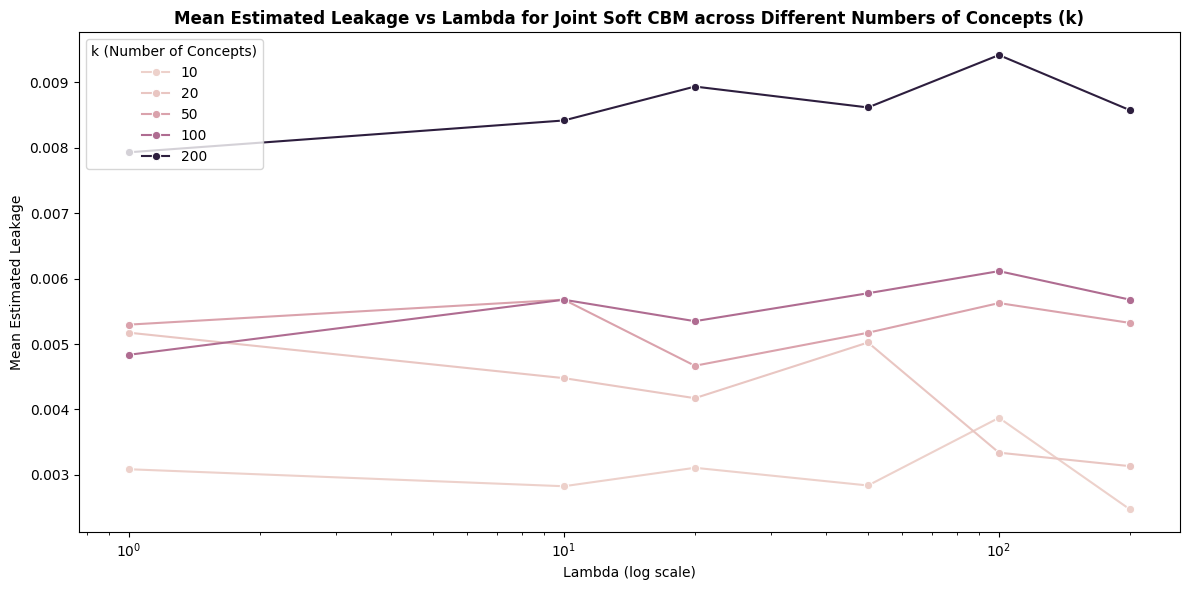

In [3]:
# =====================================================
# VISUALIZE RESULTS
# =====================================================
# 1. Leakage vs. Alpha for Joint Soft CBM across different k values
joint_soft_configs = mean_leakage[
    (mean_leakage['CBM_Type'] == 'soft') &
    (mean_leakage['Training_Mode'] == 'joint')
]

if not joint_soft_configs.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=joint_soft_configs, x='Alpha', y='Leakage', hue='k', marker='o')
    plt.xscale('log')  # Since alpha is on a log scale
    plt.title('Mean Estimated Leakage vs Lambda for Joint Soft CBM across Different Numbers of Concepts (k)', 
              fontdict={'weight': 'bold'})
    plt.xlabel('Lambda (log scale)')
    plt.ylabel('Mean Estimated Leakage')
    plt.legend(title='k (Number of Concepts)')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo data available for Joint Soft CBM configurations to plot 'Leakage vs Alpha'.")


In [3]:
leakage_results

,CBM_Type,Training_Mode,Alpha,k,Run,Leakage,Warning,num_sim,n,d
0,soft,joint,1.0,10,1,0.003828,False,15,2000,700
1,soft,joint,1.0,10,2,0.008421,False,15,2000,700
2,soft,joint,1.0,10,3,0.003821,False,15,2000,700
3,soft,joint,1.0,10,4,0.000321,False,15,2000,700
4,soft,joint,1.0,10,5,0.003215,False,15,2000,700
...,...,...,...,...,...,...,...,...,...,...
1720,embedding,joint,NaN,200,11,0.010969,False,15,2000,700
1721,embedding,joint,NaN,200,12,0.004742,False,15,2000,700
1722,embedding,joint,NaN,200,13,0.009681,False,15,2000,700
1723,embedding,joint,NaN,200,14,0.009429,False,15,2000,700


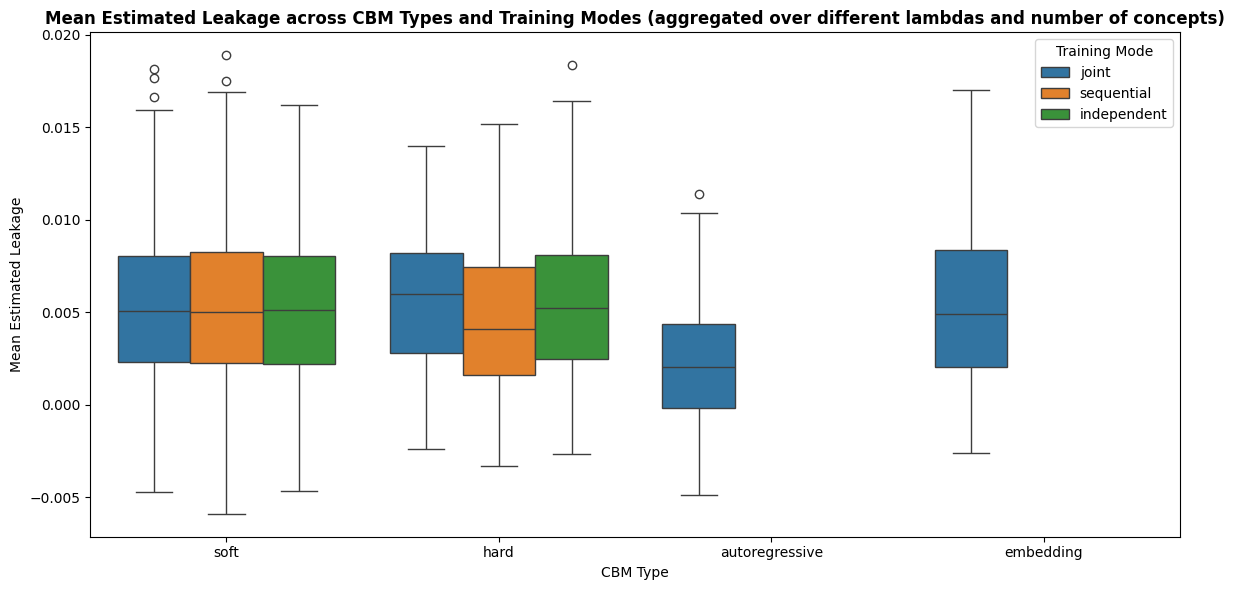

In [12]:
# 2. Leakage across All Configurations for different k values
plt.figure(figsize=(12, 6))  # Increased plot size
sns.boxplot(x='CBM_Type', y='Leakage', hue='Training_Mode', data=leakage_results)
plt.title('Mean Estimated Leakage across CBM Types and Training Modes (aggregated over different lambdas and number of concepts)', 
          fontdict={'weight': 'bold'})
plt.xlabel('CBM Type')
plt.ylabel('Mean Estimated Leakage')
plt.legend(title='Training Mode')
plt.tight_layout()
plt.show()


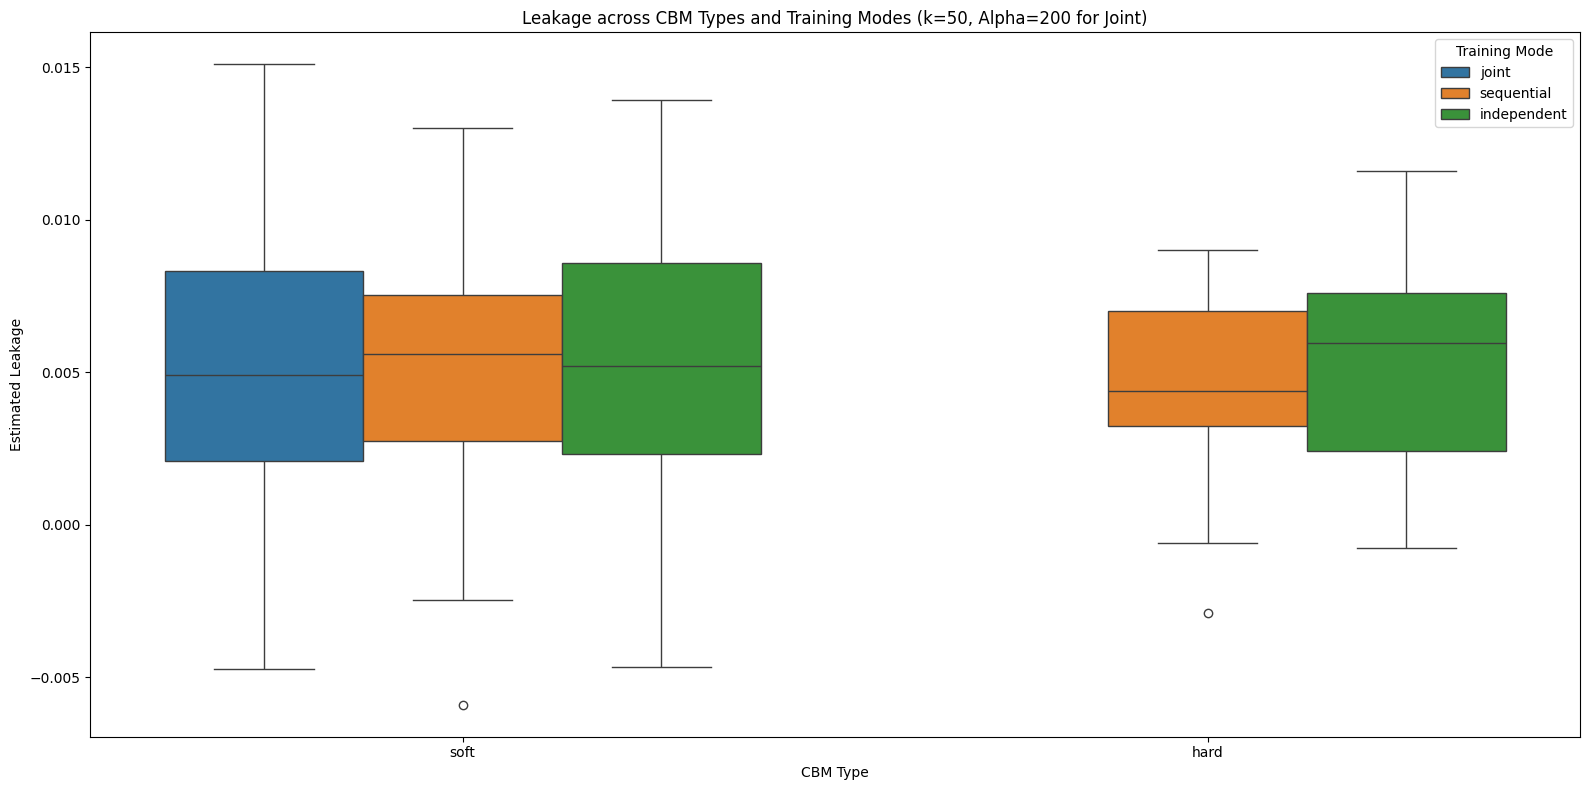

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the desired values for k and Alpha
k_value = 50
alpha_value = 200

# Filter the DataFrame:
# 1. For joint training mode, apply the specific Alpha filter.
# 2. For other training modes, ignore Alpha and just filter for the specified k value.
filtered_data = leakage_results[
    ((leakage_results['Training_Mode'] == 'joint') & (leakage_results['Alpha'] == alpha_value)) |
    ((leakage_results['Training_Mode'] != 'joint') & (leakage_results['k'] == k_value))
]

# Plot the filtered data
plt.figure(figsize=(16, 8))
sns.boxplot(x='CBM_Type', y='Leakage', hue='Training_Mode', data=filtered_data)
plt.title(f'Leakage across CBM Types and Training Modes (k={k_value}, Alpha={alpha_value} for Joint)')
plt.xlabel('CBM Type')
plt.ylabel('Estimated Leakage')
plt.legend(title='Training Mode')
plt.tight_layout()
plt.show()

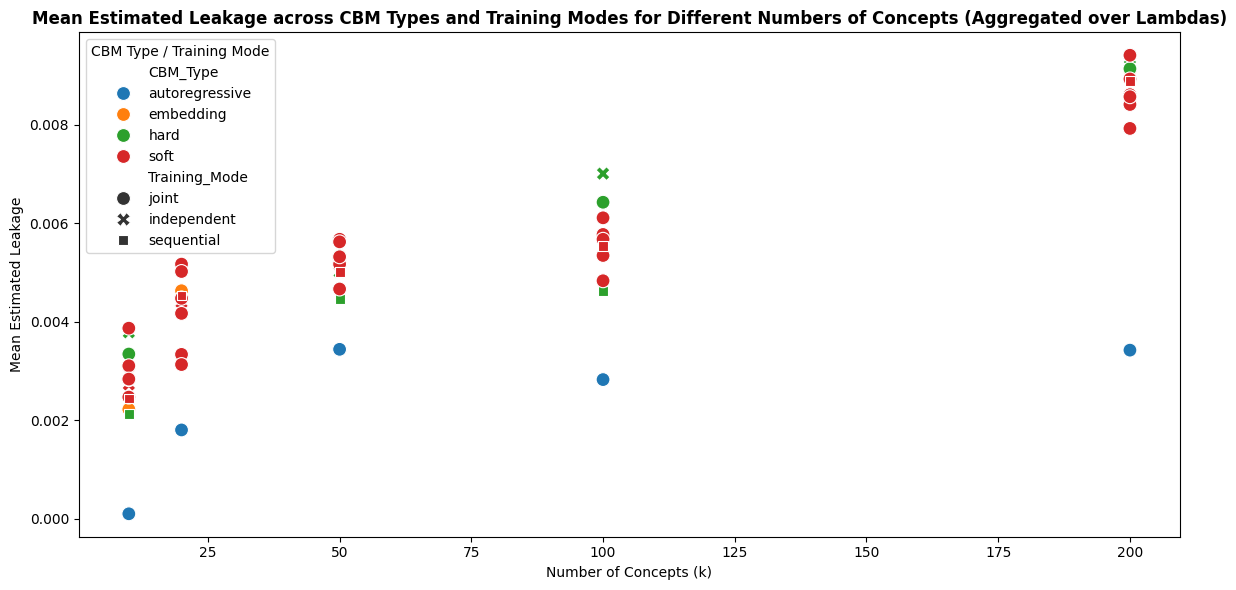

In [16]:
# 3. Leakage across All Configurations and k values
plt.figure(figsize=(12, 6))
sns.scatterplot(data=mean_leakage, x='k', y='Leakage', hue='CBM_Type', style='Training_Mode', s=100)
plt.title('Mean Estimated Leakage across CBM Types and Training Modes for Different Numbers of Concepts (Aggregated over Lambdas)', 
          fontdict={'weight': 'bold'})
plt.xlabel('Number of Concepts (k)')
plt.ylabel('Mean Estimated Leakage')
plt.legend(title='CBM Type / Training Mode')
plt.tight_layout()
plt.show()


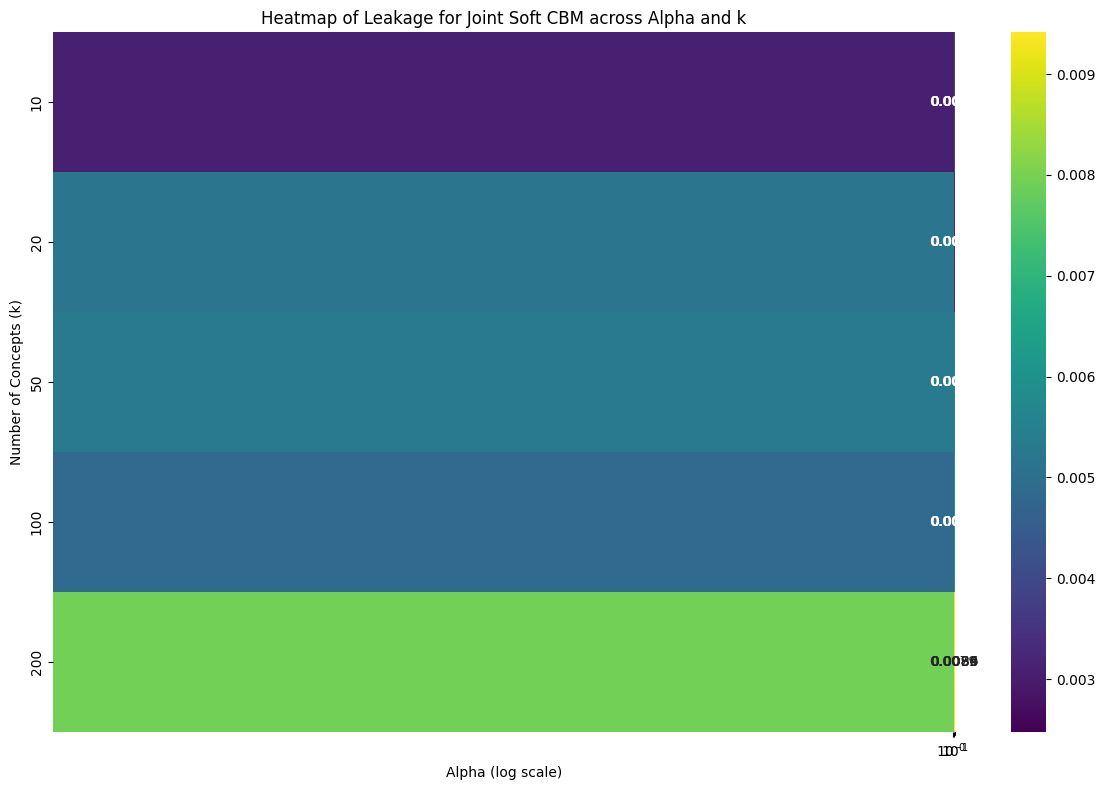

In [10]:
# 4. Heatmap of Leakage for Joint Soft CBM
if not joint_soft_configs.empty:
    pivot_table = joint_soft_configs.pivot(index='k', columns='Alpha', values='Leakage')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="viridis")
    plt.xscale('log')  # Since alpha is on a log scale
    plt.title('Heatmap of Leakage for Joint Soft CBM across Alpha and k')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Number of Concepts (k)')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo data available for Joint Soft CBM configurations to plot 'Leakage vs Alpha' Heatmap.")
